# Итоговая работа по курсу «Python и математика для анализа данных»

1.Загрузить файл hr.csv.

In [5]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.metrics import classification_report

%matplotlib inline

In [7]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [77]:
data.describe().drop(['count', '25%', '75%', '50%'])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [31]:
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [32]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [86]:
# посмотрел какие значения есть в столбцах не integer

print(data.sales.value_counts())
print(data.salary.value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [14]:
# создал функции которые присвоят числовые значения строковым данным

def change_sales(row):
    if 'sales' in row:
        return 1
    elif 'technical' in row:
        return 2
    elif 'support' in row:
        return 3
    elif 'IT' in row:
        return 4
    elif 'product_mng' in row:
        return 5
    elif 'marketing ' in row:
        return 6
    elif 'RandD ' in row:
        return 7
    elif 'accounting ' in row:
        return 8
    elif 'hr' in row:
        return 9
    elif 'management ' in row:
        return 10
    
def change_salary(row):
    if 'low' in row:
        return 1
    elif 'medium' in row:
        return 2
    elif 'high' in row:
        return 3

In [15]:
# добавил столбцы salary & sales с числовыми значениями

data['sales_int'] = data['sales'].apply(change_sales)
data['salary_int'] = data['salary'].apply(change_salary)

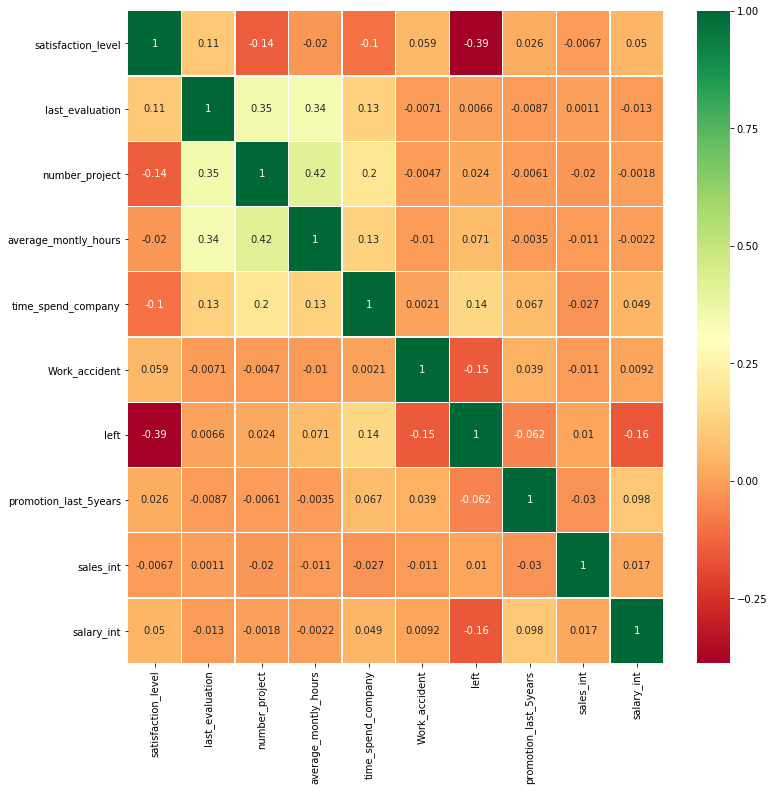

In [110]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)

- максимальная положительная корреляция между значениями average_montly_hours и number_project
- также есть наибольшая отрицательная корреляция между satisfaction_level и left

4.Визуализировать несколько взаимосвязей между переменными.

Text(0.5, 0, 'average_montly_hours')

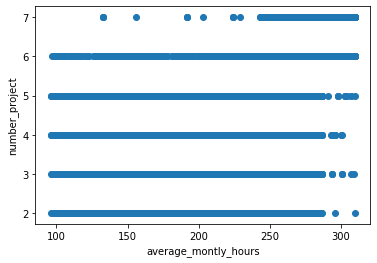

In [12]:
plt.scatter(data.average_montly_hours, data.number_project)
plt.ylabel('number_project')
plt.xlabel('average_montly_hours')

Text(0.5, 0, 'left')

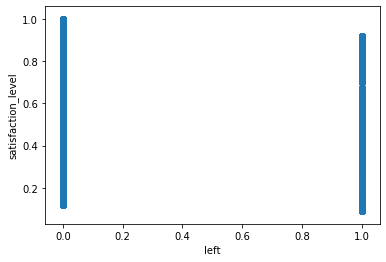

In [130]:
plt.scatter(data.left, data.satisfaction_level)
plt.ylabel('satisfaction_level')
plt.xlabel('left')

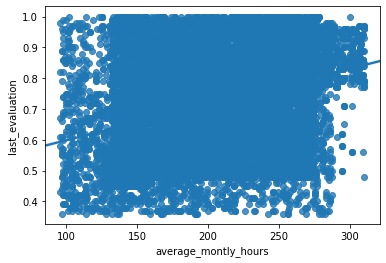

In [10]:
sns.regplot(x= data.average_montly_hours, y=data.last_evaluation,data=data, fit_reg=True)

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [34]:
# расчитаем распределение average_montly_hours департамента продавцов ко всем работникам

averege_sales = data[data['sales'] == 'sales']['average_montly_hours']
stats.ttest_1samp(averege_sales, data.average_montly_hours.mean())

Ttest_1sampResult(statistic=-0.18043896927539904, pvalue=0.8568167970741918)

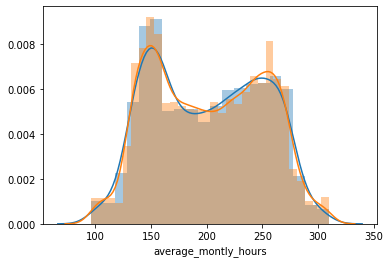

In [35]:
sns.distplot(averege_sales)
sns.distplot(data.average_montly_hours)

- значимые отличия отсутствуют между показателем average_montly_hours для продавцов и всеми остальными сотрудниками

In [39]:
# рассмотрим, отличается ли уровень удволетворенности сотрудников с высокой зарплатой, от стальных работников

satisfaction_high = data[data['salary'] == 'high']['satisfaction_level']
stats.ttest_1samp(satisfaction_high, data.satisfaction_level.mean())

Ttest_1sampResult(statistic=3.82059975018617, pvalue=0.00013974368695866474)

- p-value < 0.05, можно сделать вывод, что удволетворенность работников с высокой зарплатой значимо отличается от остальных.

6.Рассчитать сколько работников работает в каждом департаменте.

In [40]:
departaments_stuff = data.sales.value_counts()
departaments_stuff

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

- Sales является департаментом с наимбольшей численностью.
- Managmement самый малочисленный департамент

7.Показать распределение сотрудников по зарплатам.

Text(0.5, 0, 'salary')

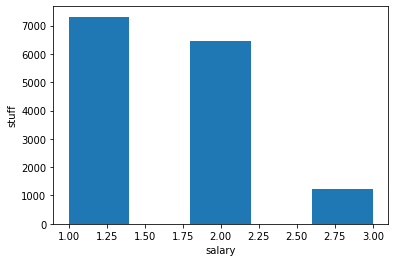

In [23]:
plt.hist(data.salary_int, bins=5)
plt.ylabel('stuff')
plt.xlabel('salary')

- основные зарплаты со значениями low и medium
- работников с зарплатой high меньше всего

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

(array([2099.,    0.,    0.,    0.,    0., 1772.,    0.,    0.,    0.,
         269.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

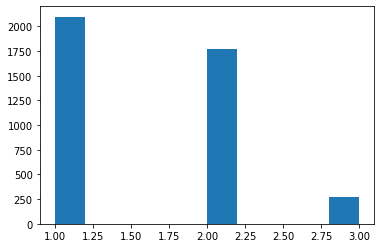

In [13]:
# sales

plt.hist(data[data['sales_int'] == 1]['salary_int'])

(array([1372.,    0.,    0.,    0.,    0., 1147.,    0.,    0.,    0.,
         201.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

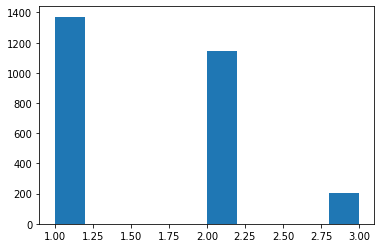

In [14]:
# technical

plt.hist(data[data['sales_int'] == 2]['salary_int'])

(array([1146.,    0.,    0.,    0.,    0.,  942.,    0.,    0.,    0.,
         141.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

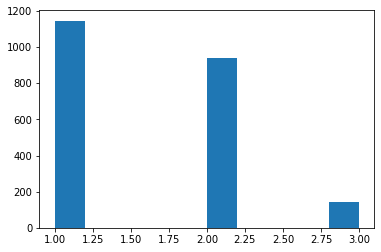

In [15]:
# support 

plt.hist(data[data['sales_int'] == 3]['salary_int'])

(array([609.,   0.,   0.,   0.,   0., 535.,   0.,   0.,   0.,  83.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

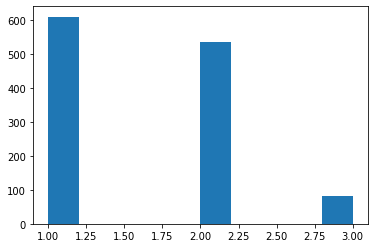

In [16]:
# IT  

plt.hist(data[data['sales_int'] == 4]['salary_int'])

(array([451.,   0.,   0.,   0.,   0., 383.,   0.,   0.,   0.,  68.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

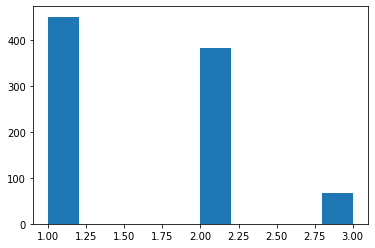

In [17]:
# product_mng

plt.hist(data[data['sales_int'] == 5]['salary_int'])

- почти во всех департаментах распределение зарплат одинаковое, low и medium больше всего, наименьшее количество с зп high

(array([335.,   0.,   0.,   0.,   0., 359.,   0.,   0.,   0.,  45.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

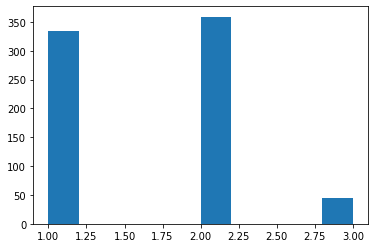

In [21]:
# hr 

plt.hist(data[data['sales_int'] == 9]['salary_int'])

- в департаменте HR распределение зп отличается от других. Наибольшее количество сотрудников получают medium, в остальных департаментах это low

In [43]:
depart = data.groupby(by='sales').sum()['salary_int']
depart

sales
IT             1928
RandD          1261
accounting     1250
hr             1188
management     1305
marketing      1394
product_mng    1421
sales          6450
support        3453
technical      4269
Name: salary_int, dtype: int64

9.Сколько сотрудников покинули компанию.

In [8]:
print('Из компании уволилось:', data[data.left == 1].left.sum())

Из компании уволилось: 3571


10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [6]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales_int,salary_int
0,0.38,0.53,2,157,3,0,1,0,sales,low,1.0,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1.0,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1.0,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1.0,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1.0,1


In [8]:
### посчиатал p-value для группы уволевшихся сотрудников ко всем показателям. Вывел то что имеет статистическую значимость

data_ = data.drop(columns=['sales', 'salary'])
for i in data_.columns:
    data_left = data_[data_.left == 1][i]
    t, p =  stats.ttest_1samp(data_left, data_[i].mean())
    print(i, p)

satisfaction_level 9.012781195378076e-279
last_evaluation 0.5433010700614106
number_project 0.08482128282514263
average_montly_hours 5.598760530139529e-10
time_spend_company 2.518024251375598e-110
Work_accident 6.146641075602401e-150
left 0.0
promotion_last_5years 2.5532378106507945e-38
sales_int nan
salary_int 1.4968776514076134e-84


11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете